# Hands-on Activity 9.2 Customized Visualizations using Seaborn

## Instructions:

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

## Resources:



Download the following datasets:
- fb_stock_prices_2018.csv ,
- earthquakes-1.csv

## Procedures:


- 9.4 Introduction to Seaborn
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.4%20Introduction%20to%20Seaborn
- 9.5 Formatting Plots
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.5%20Formatting%20Plots
- 9.6 Customizing Visualizations
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.6%20Customizing%20Visualizations

## Data Analysis:


Provide comments on output from the procedures.

## Supplementary Activity:

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as mnp
import seaborn as sns

equake = pd.read_csv(
    '/content/earthquakes-1.csv' # for the Earthqukae Datasets
)

fbprice = pd.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col = 'date', parse_dates=True
) # for the fb stock price as well

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

<ipython-input-140-c325be9d256a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  equake.query('magType == "mb" and tsunami == 1').corr(), # there was a tsunami with the magType of mb


<Axes: >

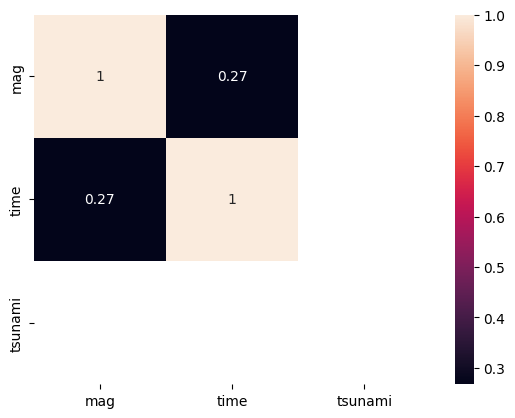

In [140]:
sns.heatmap(
    equake.query('magType == "mb" and tsunami == 1').corr(), # there was a tsunami with the magType of mb
    annot = True, # for the annotations / numerical values
)

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

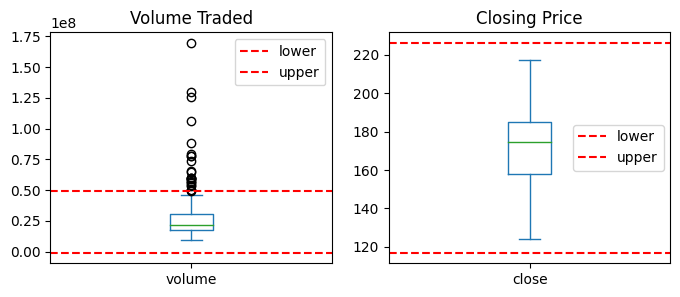

In [141]:
cols = ['volume', 'close']
subset = fbprice[cols]
quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(
    kind='box',
    subplots=True,
    figsize=(8, 3),
    title=['Volume Traded', 'Closing Price'])

for ax, col in zip(axes, cols):
  stats = quantiles[col]
  lower = stats.loc[0.25] - 1.5 * stats['iqr']
  upper = stats.loc[0.75] + 1.5 * stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline( bound, color='red', linestyle='dashed', label=name )
    ax.legend()

3. Fill in the area between the bounds in the plot from exercise #2.

In [142]:
# To be answered

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

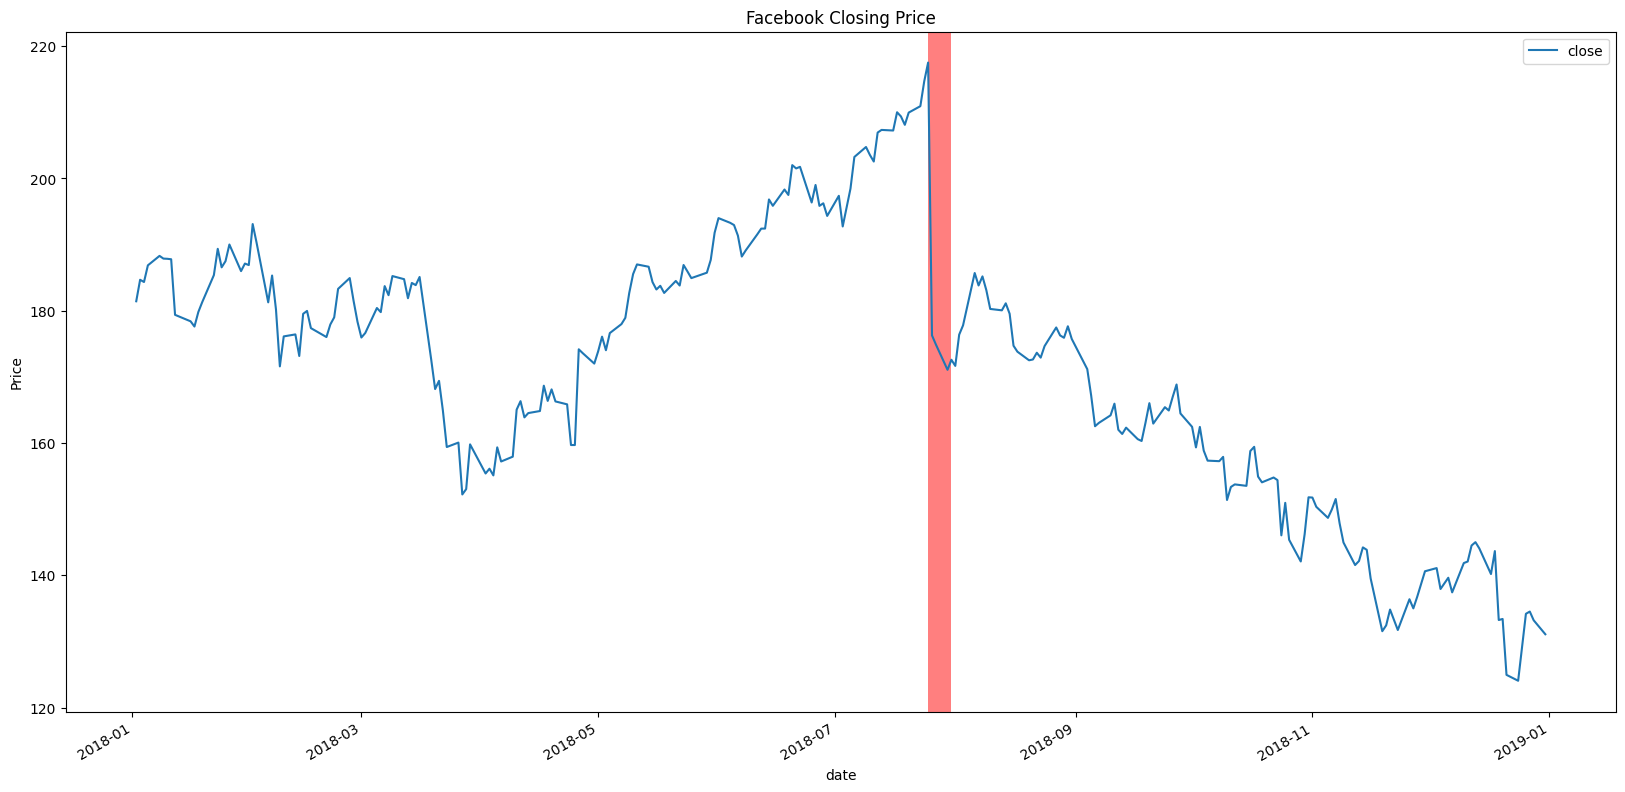

In [143]:
import datetime # for the date to be easily determined

fbprice.plot(
    kind = 'line',
    y = 'close',
    figsize = (20 ,10),
    title = 'Facebook Closing Price',
    ylabel = 'Price'
) # basic line Plot

plt.axvspan(
    datetime.datetime.strptime("2018-07-25", '%Y-%m-%d'), # staring position
    datetime.datetime.strptime("2018-07-31", '%Y-%m-%d'), # ending Position
    facecolor='r', # Color: red since its signifies downfall/critical decline
    alpha=0.5 # capacity
    )


5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

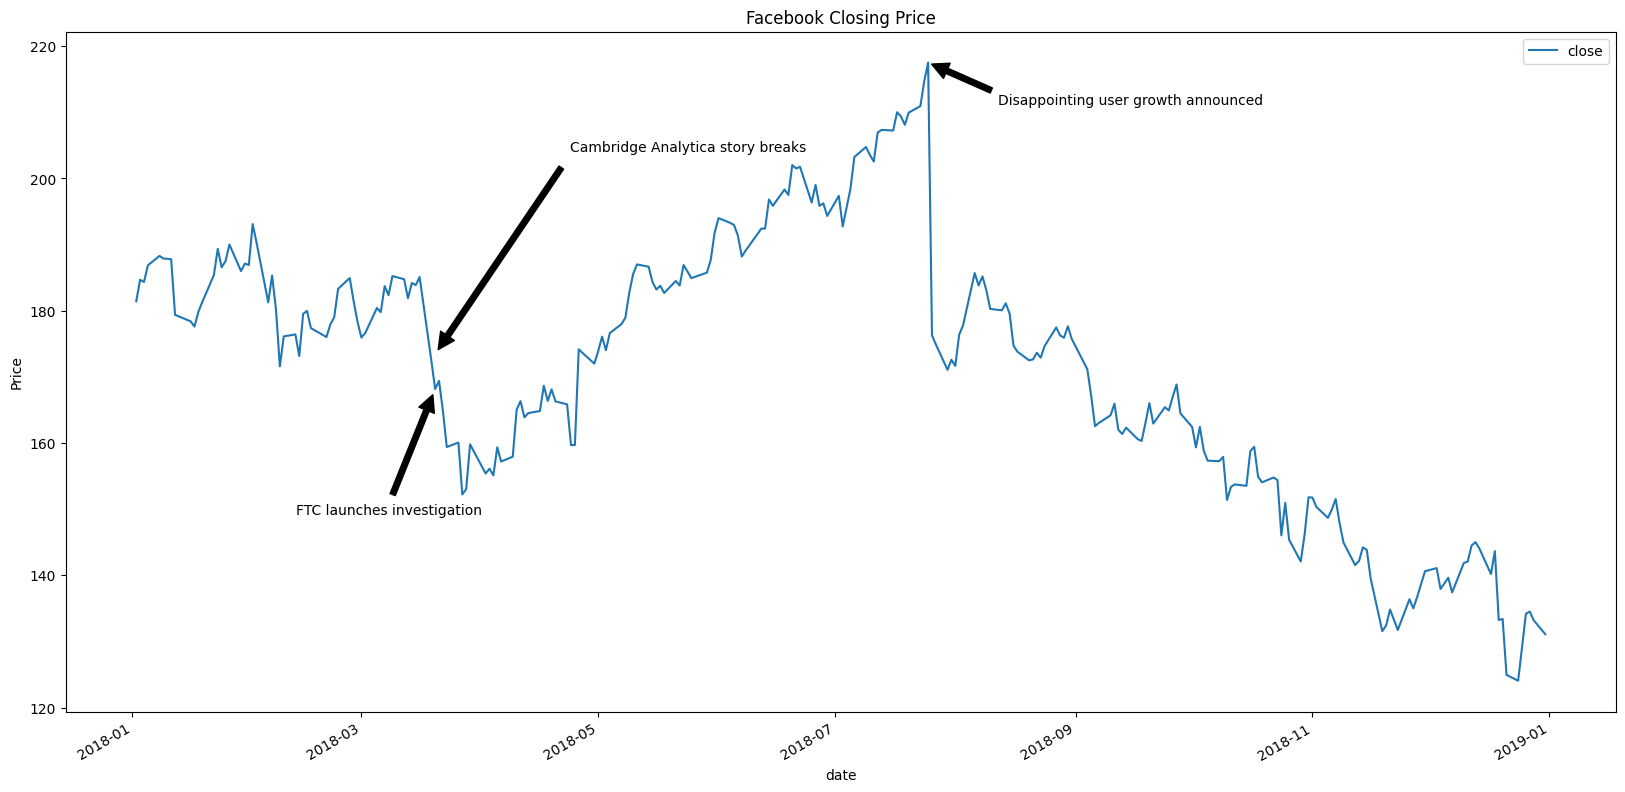

In [144]:
closing_line = fbprice.plot(
    kind = 'line',
    y = 'close',
    figsize = (20 ,10),
    title = 'Facebook Closing Price',
    ylabel = 'Price',
) # The Line Plotting

def annotate(dates, events, xy):
  for i in range(len(dates)): # looping through the array passed
    closing_line.annotate(
            f'{events[i]}',  # the text to annotate
            xy = (f'{dates[i]}',fbprice.loc[f'{dates[i]}'].close), # the position of the target values
            xytext = (xy[i][0], xy[i][1]), # the position of the text
            textcoords="offset points", # seek documentation
            arrowprops=dict(facecolor='black', shrink=0.05) # for the arrow to pinpoint
      )

annotate(
    ['2018-07-25','2018-03-19','2018-03-20'], # dates
    ['Disappointing user growth announced',
     'Cambridge Analytica story breaks',
     'FTC launches investigation'], # events
      [[50, -30], [100, 150], [-100, -90]] # positions of the text: follows a degree positioning I guess
    )

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [145]:
# to be answered

## Summary/Conclusion:

This Activity seems not yet passing through my understanding but I think seabornis on a simple yet quite comprehensive libraries ive ever used alongside pandas. With many functions you can use, this things makes me lose my mind and can cause head aches. But still I want to learn more about it in the future and I start learning it more!